# 征信系列-用户行为数据分析 —— 何数学

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# >>> Q1: 数据读入

In [2]:
raw_data = pd.read_csv(r'.\simudata.csv')
print(raw_data.shape)
raw_data.head()

(8032, 27)


,creded,debitF,meanpay,billnum,debitM,zhongxingM,sidaM,xindaiR,cardnum,xindaiF,...,sidaR,zhongxingF,zhongxingR,xiaofeiF,jinkaF,zhuanzhangM,gongjiaoM,youxiM,xindaiS,black
0,0.02,28,474795,4,784137.54,56826,307042,365.00,2,6,...,7.83,4,334.38,6,9,508646.02,297.83,66.02,5760.22,1
1,0.16,2,346573,32,1217.43,43644,15096,311.73,9,0,...,91.77,14,365.00,1,11,425876.24,3521.03,22.75,83872.62,1
2,0.32,56,168844,191,95001.76,279217,69815,42.32,8,0,...,36.05,10,27.08,1,2,492287.84,467.64,6.66,31110.55,1
3,0.01,28,69002,89,487782.48,273731,329437,81.60,15,1,...,10.08,8,191.04,1,8,240067.26,288.67,119.98,7876.13,1
4,0.19,6,408647,104,22039.56,13529,24725,254.60,17,9,...,324.21,23,248.39,7,0,455464.47,11834.25,28.97,13765.38,0


In [3]:
raw_data.describe()

,creded,debitF,meanpay,billnum,debitM,zhongxingM,sidaM,xindaiR,cardnum,xindaiF,...,sidaR,zhongxingF,zhongxingR,xiaofeiF,jinkaF,zhuanzhangM,gongjiaoM,youxiM,xindaiS,black
count,8032.000000,8032.000000,8.032000e+03,8032.000000,8.032000e+03,8.032000e+03,8.032000e+03,8032.000000,8032.000000,8032.000000,...,8032.000000,8032.000000,8032.000000,8032.000000,8032.000000,8.032000e+03,8032.000000,8032.000000,8032.000000,8032.000000
mean,0.144796,35.455802,2.717996e+05,74.471489,3.050731e+05,1.617706e+05,2.715348e+05,163.339720,6.394796,4.159985,...,148.532261,7.812251,237.543242,2.578312,6.101469,3.046979e+05,6079.254307,209.638073,106103.725818,0.333665
std,0.143946,35.141984,2.352257e+05,71.310466,2.597760e+05,1.714516e+05,2.460283e+05,104.671216,4.379306,3.633870,...,99.256973,8.336176,106.227388,3.035972,7.047664,2.963735e+05,7530.265840,260.277361,94056.103030,0.471551
min,0.000000,0.000000,0.000000e+00,0.000000,2.600000e+01,3.000000e+00,1.000000e+01,0.020000,0.000000,0.000000,...,0.160000,0.000000,0.170000,0.000000,0.000000,3.821000e+01,0.020000,0.000000,8.050000,0.000000
25%,0.020000,5.000000,5.047525e+04,11.000000,5.930946e+04,2.161650e+04,4.469200e+04,70.175000,3.000000,1.000000,...,57.222500,1.000000,157.150000,0.000000,1.000000,4.583786e+04,804.827500,28.047500,18240.015000,0.000000
50%,0.100000,25.000000,2.312770e+05,55.000000,2.648380e+05,9.791300e+04,2.197690e+05,155.520000,6.000000,4.000000,...,136.135000,5.000000,251.330000,1.000000,3.000000,2.145178e+05,2245.550000,75.050000,87971.440000,0.000000
75%,0.240000,57.000000,4.253420e+05,119.000000,4.796458e+05,2.610935e+05,4.338408e+05,241.020000,9.000000,7.000000,...,219.947500,13.000000,340.050000,4.000000,10.000000,4.963003e+05,9483.372500,329.990000,165942.247500,1.000000
max,0.820000,202.000000,1.346594e+06,427.000000,1.436086e+06,1.017770e+06,1.299826e+06,365.000000,26.000000,20.000000,...,365.000000,53.000000,365.000000,19.000000,44.000000,1.650050e+06,55745.070000,1939.000000,485178.350000,1.000000


# >>> Q2：用户交易笔数、行为均值与是否违约箱线图
* **对变量交易笔数和所有用户行为均值分别绘制违约组和非违约组的对比箱线图，并分析是否违约与这些变量之间的关系，给出解读**

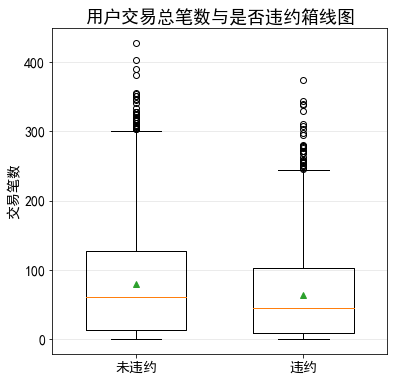

In [4]:
# 解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 画图
plt.figure(figsize=(6,6))
plt.title('用户交易总笔数与是否违约箱线图',fontsize=18)
labels = '未违约','违约'

plt.boxplot([raw_data[raw_data['black'] == 0]['billnum'], 
             raw_data[raw_data['black'] == 1]['billnum']],
            labels = labels, showmeans = True, widths = 0.6)
plt.ylabel('交易笔数',fontsize=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.grid(axis='y', alpha=0.3)

plt.show()

**由上图可看出，未违约组用户的交易总笔数整体高于违约组。即，交易频繁的用户总体而言信用水平更佳。**

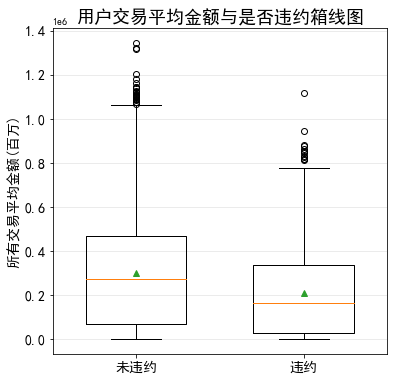

In [5]:
plt.figure(figsize=(6,6))
plt.title('用户交易平均金额与是否违约箱线图',fontsize=18)
labels = '未违约','违约'

plt.boxplot([raw_data[raw_data['black'] == 0]['meanpay'], 
             raw_data[raw_data['black'] == 1]['meanpay']],
            labels = labels, showmeans = True, widths = 0.6)
plt.ylabel('所有交易平均金额(百万)',fontsize=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.grid(axis='y', alpha=0.3)

plt.show()

**由上图可看出，未违约组用户的交易行为平均金额整体高于违约组。即，交易金额均值大的用户总体而言信用水平更佳。**

# >>> Q3&4：逻辑回归，评价并解读
* **用全部样本数据，以是否违约为因变量建立逻辑回归模型，利用 BIC 准则进行变量筛选，观察最终得到的回归系数并尝试解释对系数进行解释**

### 定义评价指标与向前回归函数

In [6]:
# 定义评价指标
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score, recall_score, f1_score

def clf_Evaluate(y_,y_pred,method):
    confusionmatrix = confusion_matrix(y_, y_pred)
    print('Confusion matrix:\n\n',confusionmatrix)
    print('\nClassification report:\n\n',classification_report(y_, y_pred))
    
    result = pd.DataFrame(columns = ['accuracy','precision','recall','f1'])
    score_list = {
        'accuracy': round(accuracy_score(y_, y_pred),4),
        'precision': round(precision_score(y_, y_pred),4),
        'recall': round(recall_score(y_, y_pred),4),
        'f1': round(f1_score(y_, y_pred),4)
    }
    result = result.append(score_list, ignore_index=True)
    result.index = pd.Series([method])
    return result

In [7]:
# 定义向前回归，参考了https://blog.csdn.net/weixin_44835596/article/details/89763300

import statsmodels.api as sma 

def forward_select(data,target):
    variate=set(data.columns)  #将字段名转换成字典类型
    variate.remove(target)  #去掉因变量的字段名
    selected=[]
    current_score,best_new_score=float('inf'),float('inf')  #目前的分数和最好分数初始值都为无穷大（BIC越小越好）
    #循环筛选变量
    while variate:
        bic_with_variate=[]
        for candidate in variate:  #逐个遍历自变量
            bic=sma.Logit(data[target], sma.add_constant(data[selected+[candidate]])).fit().bic #利用逻辑回归得出bic值
            bic_with_variate.append((bic,candidate))  #将第每一次的bic值放进空列表
        bic_with_variate.sort(reverse=True)  #降序排序bic值
        best_new_score,best_candidate=bic_with_variate.pop()  #最好的bic值等于删除列表的最后一个值，以及最好的自变量等于列表最后一个自变量
        if current_score>best_new_score:  #如果目前的bic值大于最好的bic值
            variate.remove(best_candidate)  #移除加进来的变量名，即第二次循环时，不考虑此自变量了
            selected.append(best_candidate)  #将此自变量作为加进模型中的自变量
            current_score=best_new_score  #最新的分数等于最好的分数
            print("BIC is {},continuing!".format(current_score))  #输出最小的bic值
        else:
            print("for selection over!")
            break
    
    model=sma.Logit(data[target], sma.add_constant(data[selected])).fit()
    return model, selected

### 未进行特征标准化

### <font color=red size=3> ps：以下训练时的输出（除BIC外）为调用statsmodels.api中的逻辑回归函数时官方的过程打印 </font>

In [8]:
# 模型训练
model, selected_vr = forward_select(raw_data,'black')

Optimization terminated successfully.
         Current function value: 0.636384
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.636237
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.631288
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.632366
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.636212
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.618325
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626908
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.635685
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.621123
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626604
  

In [9]:
# 输出模型结果
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  black   No. Observations:                 8032
Model:                          Logit   Df Residuals:                     8010
Method:                           MLE   Df Model:                           21
Date:                Mon, 27 Apr 2020   Pseudo R-squ.:                  0.2559
Time:                        16:42:46   Log-Likelihood:                -3805.6
converged:                       True   LL-Null:                       -5114.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -7.1009      0.490    -14.483      0.000      -8.062      -6.140
xindaiR         0.0054      0.000     19.493      0.000       0.005       0.006
creded         -4.0148      0.222    -18.090      0.000      -4.450      -3.580
meanpay     -2.322e-06   1.35e-07    -17.150      0.000   -2.59e-06   -2.06e-06
cardnum         0.1146      0.007     17.533      0.000       0.102       0.127
maxpay       3.461e-07   2.43e-08     14.241      0.000    2.98e-07    3.94e-07
xindaiF         0.1188      0.008     15.181      0.000       0.103       0.134
zhuanzhangF     0.0171      0.001     13.924      0.000       0.015       0.020
debitF         -0.0117      0.001    -13.415      0.000      -0.013      -0.010
age             0.0678      0.006     10.513      0.000       0.055       0.080
gongjiaoF       0.2331      0.021     10.927      0.000       0.191       0.275
zhuanzhangR     0.0024      0.000     10.634      0.000       0.002       0.003
billnum        -0.0041      0.000     -9.808      0.000      -0.005      -0.003
sidaM       -1.076e-06   1.21e-07     -8.864      0.000   -1.31e-06   -8.38e-07
debitM      -5.524e-07   1.11e-07     -4.997      0.000   -7.69e-07   -3.36e-07
gongjiaoR       0.0058      0.001      4.941      0.000       0.004       0.008
xiaofeiF        0.0405      0.009      4.419      0.000       0.023       0.058
sidaF           0.0048      0.001      4.330      0.000       0.003       0.007
gongjiaoM    1.528e-05   3.71e-06      4.115      0.000       8e-06    2.26e-05
zhongxingF      0.0125      0.003      3.705      0.000       0.006       0.019
jinkaF          0.0141      0.004      3.541      0.000       0.006       0.022
zhongxingR      0.0009      0.000      3.376      0.001       0.000       0.001
===============================================================================
"""

In [10]:
# 预测并评价
black_pred = model.predict(sma.add_constant(raw_data[selected_vr])) > 0.5
nostd_result = clf_Evaluate(raw_data['black'],black_pred,'未标准化')
nostd_result

Confusion matrix:

 [[4681  671]
 [1225 1455]]

Classification report:

               precision    recall  f1-score   support

           0       0.79      0.87      0.83      5352
           1       0.68      0.54      0.61      2680

   micro avg       0.76      0.76      0.76      8032
   macro avg       0.74      0.71      0.72      8032
weighted avg       0.76      0.76      0.76      8032



,accuracy,precision,recall,f1
未标准化,0.7639,0.6844,0.5429,0.6055


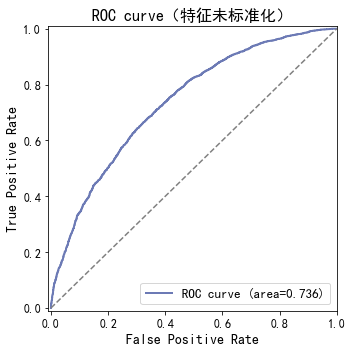

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_curve

logit = LogisticRegression().fit(raw_data[selected_vr],raw_data['black'])

y_score = logit.decision_function(raw_data[selected_vr])
fpr, tpr, _ = roc_curve(raw_data['black'], y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,5))

plt.subplot(1,1,1)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr,lw=2, c='#6C7AB5', label='ROC curve (area={:0.3f})'.format(roc_auc))
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC curve（特征未标准化）',fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.plot([0, 1], [0, 1], c='gray', linestyle='--')

plt.tight_layout()
plt.show()

### 进行特征标准化

In [ ]:
# 这么做的话列名没了，换一种
# from sklearn import preprocessing

# std_data = preprocessing.StandardScaler().fit_transform(raw_data.drop('black', axis=1))
# std_data

In [12]:
# 特征标准化
from sklearn import preprocessing

std_data = raw_data.copy()
rv_list = list(raw_data.columns)
rv_list.remove('black')
for rv in rv_list:
    std_data[rv] = preprocessing.scale([i for i in std_data[rv]])
std_data.head()

,creded,debitF,meanpay,billnum,debitM,zhongxingM,sidaM,xindaiR,cardnum,xindaiF,...,sidaR,zhongxingF,zhongxingR,xiaofeiF,jinkaF,zhuanzhangM,gongjiaoM,youxiM,xindaiS,black
0,-0.867016,-0.212175,0.863035,-0.988296,1.844259,-0.612133,0.144330,1.926727,-1.003600,0.506383,...,-1.417644,-0.457343,0.911656,1.127119,0.411301,0.688189,-0.767806,-0.551823,-1.066914,1
1,0.105631,-0.952077,0.317899,-0.595623,-1.169756,-0.689022,-1.042379,1.417768,0.594927,-1.144852,...,-0.571907,0.742323,1.199923,-0.519903,0.695101,0.408896,-0.339747,-0.718079,-0.236375,1
2,1.217227,0.584642,-0.437716,1.634203,-0.808714,0.685055,-0.819956,-1.156261,0.366566,-1.144852,...,-1.133313,0.262457,-1.981376,-0.519903,-0.581998,0.632991,-0.745254,-0.779902,-0.797374,1
3,-0.936491,-0.212175,-0.862194,0.203749,0.703378,0.653056,0.235362,-0.780967,1.965092,-0.869646,...,-1.394974,0.022524,-0.437798,-0.519903,0.269401,-0.218085,-0.769023,-0.344493,-1.044416,1
4,0.314055,-0.838246,0.581807,0.414110,-1.089597,-0.864680,-1.003239,0.871930,2.421814,1.332001,...,1.770039,1.822022,0.102115,1.456523,-0.865797,0.508736,0.764296,-0.694180,-0.981798,0


### <font color=red size=3> ps：以下训练时的输出（除BIC外）为调用statsmodels.api中的逻辑回归函数时官方的过程打印 </font>

In [13]:
# 模型训练
model_std, selected_vr_std = forward_select(std_data,'black')

Optimization terminated successfully.
         Current function value: 0.636384
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.636237
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.631288
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.632366
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.636212
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.618325
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626908
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.635685
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.621123
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626604
  

In [14]:
# 输出模型结果
model_std.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  black   No. Observations:                 8032
Model:                          Logit   Df Residuals:                     8010
Method:                           MLE   Df Model:                           21
Date:                Mon, 27 Apr 2020   Pseudo R-squ.:                  0.2559
Time:                        16:44:01   Log-Likelihood:                -3805.6
converged:                       True   LL-Null:                       -5114.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.0072      0.031    -32.452      0.000      -1.068      -0.946
xindaiR         0.5681      0.029     19.493      0.000       0.511       0.625
creded         -0.5779      0.032    -18.090      0.000      -0.640      -0.515
meanpay        -0.5462      0.032    -17.150      0.000      -0.609      -0.484
cardnum         0.5019      0.029     17.533      0.000       0.446       0.558
maxpay          0.4019      0.028     14.241      0.000       0.347       0.457
xindaiF         0.4315      0.028     15.181      0.000       0.376       0.487
zhuanzhangF     0.3931      0.028     13.924      0.000       0.338       0.448
debitF         -0.4110      0.031    -13.415      0.000      -0.471      -0.351
age             0.3044      0.029     10.513      0.000       0.248       0.361
gongjiaoF       0.3048      0.028     10.927      0.000       0.250       0.359
zhuanzhangR     0.3041      0.029     10.634      0.000       0.248       0.360
billnum        -0.2946      0.030     -9.808      0.000      -0.353      -0.236
sidaM          -0.2646      0.030     -8.864      0.000      -0.323      -0.206
debitM         -0.1435      0.029     -4.997      0.000      -0.200      -0.087
gongjiaoR       0.1429      0.029      4.941      0.000       0.086       0.200
xiaofeiF        0.1228      0.028      4.419      0.000       0.068       0.177
sidaF           0.1222      0.028      4.330      0.000       0.067       0.177
gongjiaoM       0.1150      0.028      4.115      0.000       0.060       0.170
zhongxingF      0.1042      0.028      3.705      0.000       0.049       0.159
jinkaF          0.0994      0.028      3.541      0.000       0.044       0.154
zhongxingR      0.0957      0.028      3.376      0.001       0.040       0.151
===============================================================================
"""

In [15]:
# 预测并评价
black_pred_std = model_std.predict(sma.add_constant(std_data[selected_vr_std])) > 0.5
std_result = clf_Evaluate(std_data['black'],black_pred_std,'标准化')
std_result

Confusion matrix:

 [[4681  671]
 [1225 1455]]

Classification report:

               precision    recall  f1-score   support

           0       0.79      0.87      0.83      5352
           1       0.68      0.54      0.61      2680

   micro avg       0.76      0.76      0.76      8032
   macro avg       0.74      0.71      0.72      8032
weighted avg       0.76      0.76      0.76      8032



,accuracy,precision,recall,f1
标准化,0.7639,0.6844,0.5429,0.6055


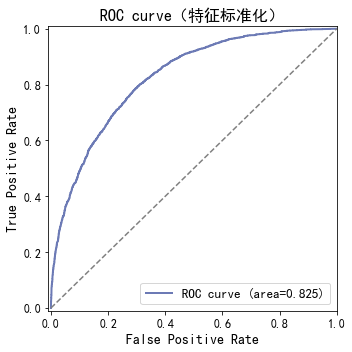

In [16]:
logit_std = LogisticRegression().fit(std_data[selected_vr_std],std_data['black'])

y_score_std = logit_std.decision_function(std_data[selected_vr_std])
fpr, tpr, _ = roc_curve(std_data['black'], y_score_std)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,5))

plt.subplot(1,1,1)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr,lw=2, c='#6C7AB5', label='ROC curve (area={:0.3f})'.format(roc_auc))
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC curve（特征标准化）', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.plot([0, 1], [0, 1], c='gray', linestyle='--')

plt.tight_layout()
plt.show()

**以预测概率0.5为阈值时，根据混淆矩阵，特征是否标准化无影响。但根据ROC曲线以及AUC指标来看，特征未标准化时AUC为0.736，标准化后AUC为0.825，因此选择特征标准化后的模型。**

**由特征标准化后的模型逐步回归的参数可看出：**
* **用户违约概率会随以下因素增大而增大，最重要的6个因素是：用户最近一次贷款距今的时间、用户持有的银行卡数、最大交易金额、贷款频率、转账频率、最近一次公缴距今的时间。由此可以得出，贷款行为不活跃、持卡过多、交易金额极端、贷款频繁、转账频繁、公缴拖延的用户更容易违约。**
* **用户违约概率会随以下因素增大而减小，最重要的6个因素是：借贷比率、平均交易金额、储蓄频率、交易笔数、使用四大行卡交易均值、储蓄均值。由此可以得出，比起储蓄卡更多使用信用卡、交易频繁且金额均值高、储蓄频繁且金额均值高、使用四大行卡的用户更不容易违约。**

# >>> Q5：按照非违约率分组排序
* **按照非违约率从高到低排序，将全部样本分为5 组人群：非违约率最高的20%用户、…、非违约率最低的20%用户，计算五类人群的平均非违约概率，从高到低排序，绘制柱状图；对结果的商业应用进行解读。**

In [17]:
# 按照非违约概率从高到低排序，i.e. 按照违约概率从低到高排序
prob_std = model_std.predict(sma.add_constant(std_data[selected_vr_std])).sort_values() 
prob_std

1814    0.001096
3877    0.001791
6016    0.001867
2761    0.001946
7502    0.002001
          ...   
7323    0.986598
4021    0.987044
2557    0.987139
2123    0.989805
344     0.993467
Length: 8032, dtype: float64

In [18]:
# 非违约概率分组，各组的非违约概率
group_num = round(prob_std.shape[0]/5)
group_mean = []
for i in range(5):
    try:
        group_mean.append(1-prob_std[i*group_num:(i+1)*group_num].mean())
    except: # 最后一组
        group_mean.append(1-prob_std[i*group_num:].mean())
print('非违约概率分组，各组的非违约概率：')
group_mean

非违约概率分组，各组的非违约概率：


[0.9545723186873661,
 0.8607471007117068,
 0.7267711685000018,
 0.5387785301165839,
 0.25162357959256254]

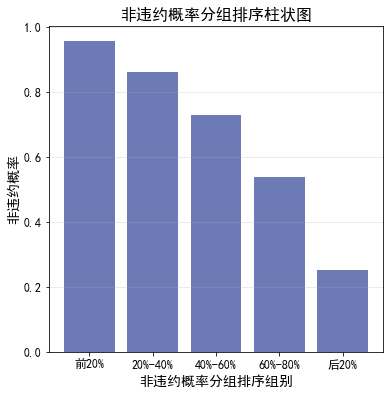

In [19]:
plt.figure(figsize = (6,6))
labels = '前20%','20%-40%','40%-60%','60%-80%','后20%'
plt.bar(range(len(labels)), group_mean, tick_label = labels, color = '#6C7AB5')
plt.title('非违约概率分组排序柱状图',fontsize=16)
plt.ylabel('非违约概率',fontsize=14)
plt.xlabel('非违约概率分组排序组别',fontsize=14)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [51]:
prob_std = model_std.predict(sma.add_constant(std_data[selected_vr_std]))
pred_std = prob_std>0.5
pred_true = pd.DataFrame({'predict prob.':prob_std, # 预测违约概率 
                          'predict label':pred_std,
                          'true label':std_data['black']})
pred_true['predict label'] = pred_true['predict label'].map( {True: 1, False:0} )
pred_true = pred_true.sort_values(by = 'predict prob.',ascending = False) 
pred_true

,predict prob.,predict label,true label
344,0.993467,1,1
2123,0.989805,1,1
2557,0.987139,1,1
4021,0.987044,1,1
7323,0.986598,1,1
...,...,...,...
7502,0.002001,0,0
2761,0.001946,0,0
6016,0.001867,0,0
3877,0.001791,0,0


In [52]:
# 验算
sum(pred_true['predict label']== pred_true['true label'])/8032

0.7639442231075697

In [57]:
# 各组准确率
group_num = round(prob_std.shape[0]/5)
class_result = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1'])
for i in [4,3,2,1,0]:
    try:
        tmp = pred_true.iloc[i*group_num:(i+1)*group_num,:]
        tmp_result = clf_Evaluate(tmp['true label'],tmp['predict label'],'排序为'+str((4-i)*20)+'%~'+str((5-i)*20)+'%的用户')
        class_result = pd.concat([class_result, tmp_result])
    except: # 最后一组
        tmp = pred_true.iloc[i*group_num:,:]
        tmp_result = clf_Evaluate(tmp['true label'],tmp['predict label'],'排序为'+str((4-i)*20)+'%~'+str((5-i)*20)+'%的用户')        
        class_result = pd.concat([class_result, tmp_result])
print('按预测非违约概率分组，各组预测结果')
class_result

Confusion matrix:

 [[1544    0]
 [  62    0]]

Classification report:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1544
           1       0.00      0.00      0.00        62

   micro avg       0.96      0.96      0.96      1606
   macro avg       0.48      0.50      0.49      1606
weighted avg       0.92      0.96      0.94      1606

Confusion matrix:

 [[1398    0]
 [ 208    0]]

Classification report:

               precision    recall  f1-score   support

           0       0.87      1.00      0.93      1398
           1       0.00      0.00      0.00       208

   micro avg       0.87      0.87      0.87      1606
   macro avg       0.44      0.50      0.47      1606
weighted avg       0.76      0.87      0.81      1606

Confusion matrix:

 [[1123    0]
 [ 483    0]]

Classification report:

               precision    recall  f1-score   support

           0       0.70      1.00      0.82      1123
           1      

,accuracy,precision,recall,f1
排序为0%~20%的用户,0.9614,0.0000,0.0000,0.0000
排序为20%~40%的用户,0.8705,0.0000,0.0000,0.0000
排序为40%~60%的用户,0.6993,0.0000,0.0000,0.0000
排序为60%~80%的用户,0.5529,0.5269,0.3673,0.4329
排序为80%~100%的用户,0.7354,0.7354,1.0000,0.8475


**按照非违约率从高到低排序，将全部样本分为 5 组人群，分别记为“一”至“五”五类用户：**
* **在平均非违约预测概率为95%、信用预测最佳的一类用户中，有4%的用户实际上会违约，但被误判为不会违约；**
* **在平均非违约预测概率为86%、信用预测次佳的二类用户中，有13%的用户实际上会违约，但被误判为不会违约；**
* **在平均非违约预测概率为83%（均大于50%）、信用预测中等的三类用户中，有30%的用户实际上会违约，但被误判为不会违约；**
* **在平均非违约预测概率为54%、信用预测次差的四类用户中，准确率仅为55%，预测效果不太理想；**
* **在平均非违约预测概率为25%（均小于50%）、信用预测最差的五类用户中，有26%的用户实际上并不会违约，但被误判为会违约；**

**由上可以看到，若仅使用刷卡数据来判断用户是否会违约，那么对于非违约概率预测值大于90%的用户来说，这会是一个较准确的模型。当非违约概率预测值小于90%时，需要额外的信息来辅助判定用户是否会违约，且需要制定更完善的规章制度来防止用户违约行为的发生以及降低用户违约后的损失。**


